In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.rc("figure", figsize=(16, 9))
plt.rc("font", size=13)
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [22]:
df = pd.read_csv('unemployement.csv')
df = df[df['LOCATION']=='ESP'] # Get values for SPAIN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 5178 to 5402
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    225 non-null    object 
 1   INDICATOR   225 non-null    object 
 2   SUBJECT     225 non-null    object 
 3   MEASURE     225 non-null    object 
 4   FREQUENCY   225 non-null    object 
 5   TIME        225 non-null    object 
 6   Value       225 non-null    float64
 7   Flag Codes  0 non-null      object 
dtypes: float64(1), object(7)
memory usage: 15.8+ KB


In [24]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
5178,ESP,HUR,TOT,PC_LF,M,2005-01,10.1,NaN
5179,ESP,HUR,TOT,PC_LF,M,2005-02,9.9,NaN
5180,ESP,HUR,TOT,PC_LF,M,2005-03,9.7,NaN
5181,ESP,HUR,TOT,PC_LF,M,2005-04,9.7,NaN
5182,ESP,HUR,TOT,PC_LF,M,2005-05,9.4,NaN


In [26]:
# Get unemployement data

df = pd.read_csv('unemployement.csv')
df = df[df['LOCATION']=='ESP'] # Get values for SPAIN
df['TIME'] = pd.to_datetime(df['TIME'])
df = df.set_index("TIME").sort_index()
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
2005-01-01,ESP,HUR,TOT,PC_LF,M,10.1,NaN
2005-02-01,ESP,HUR,TOT,PC_LF,M,9.9,NaN
2005-03-01,ESP,HUR,TOT,PC_LF,M,9.7,NaN
2005-04-01,ESP,HUR,TOT,PC_LF,M,9.7,NaN
2005-05-01,ESP,HUR,TOT,PC_LF,M,9.4,NaN


In [29]:
pd.infer_freq(df.index)

'MS'

<Axes: title={'left': 'Annual Unemployment rate in Spain'}, xlabel='TIME'>

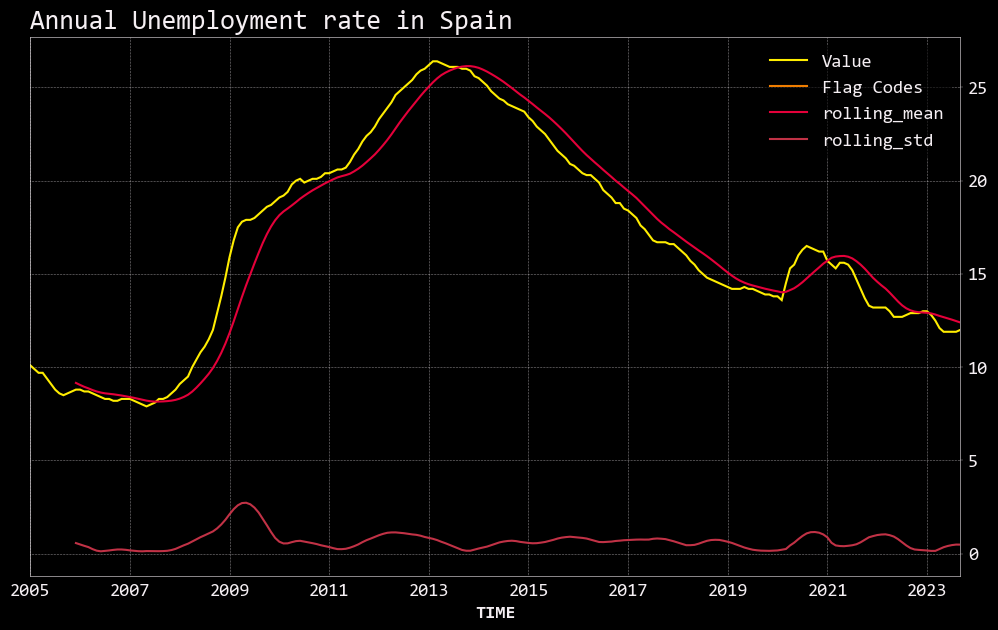

In [30]:
df["rolling_mean"] = df["Value"].rolling(window=12).mean()
df["rolling_std"] = df["Value"].rolling(window=12).std()
df.plot(title="Annual Unemployment rate in Spain", figsize = (12,7))

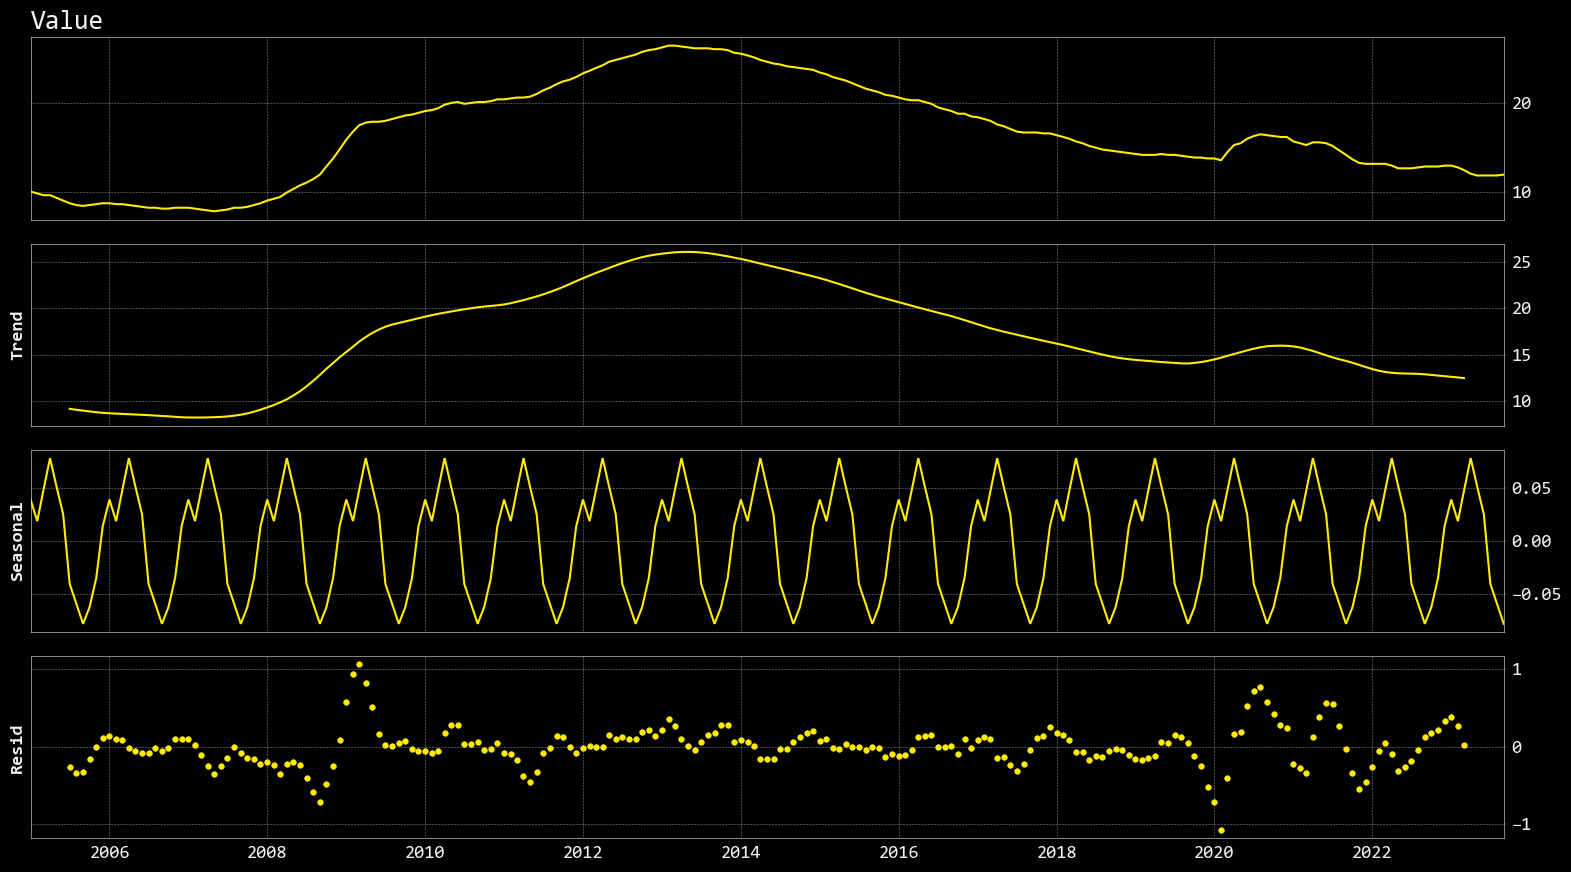

In [34]:
decomposition_results = seasonal_decompose(
    df["Value"], 
    model="additive"
)
fig = decomposition_results.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()


The code extracted the trend, seasonal, and noise components from the time series. Take a look at the noise component and inspect if it looks random. If there was a strong pattern, it would tell you the time series is serially auto-correlated and the model fit is suspect.

The additive model is basic and comes with caveats. First, there are missing data points at the beginning and end because the algorithm uses a moving average. The model assumes there’s the same seasonal pattern every year. Finally, the model is not robust to outliers.

Time to try a more robust method.

## Decompose the time series with LOESS

Seasonal-trend decomposition (STL) uses locally estimated scatterplot smoothing (LOESS) to extract seasonality and trend from a time series. It improves on the basic additive model by handling any kind of seasonality and being more robust to outliers.

Text(0.5, 0.98, 'STL Decomposition')

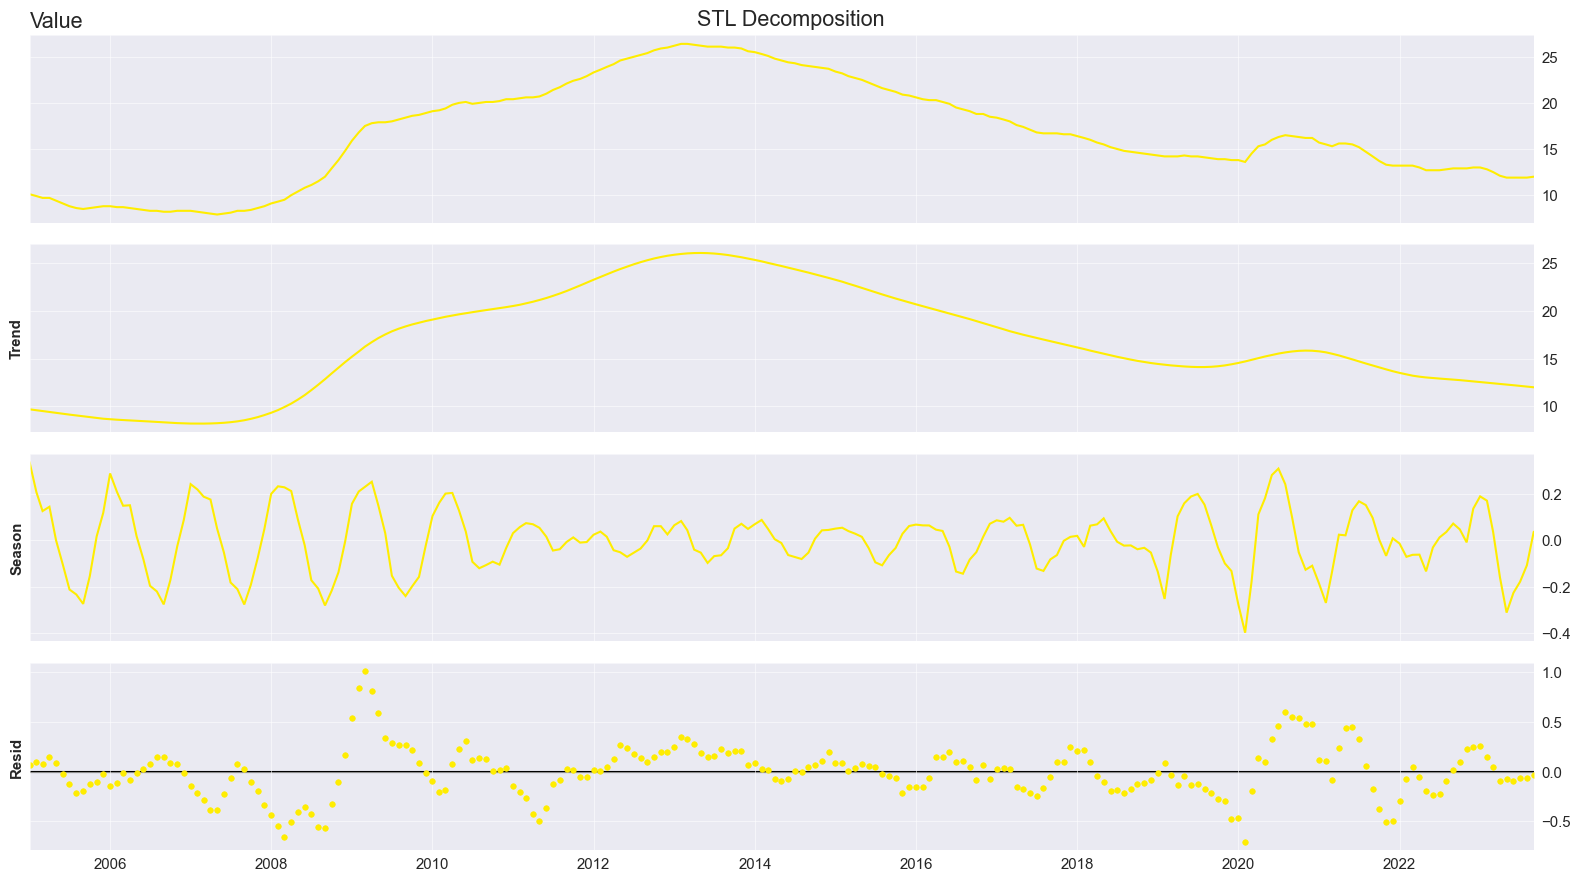

In [44]:
stl_decomposition = STL(df["Value"]).fit()

stl_decomposition.plot().suptitle("STL Decomposition")


